In [1]:
import geopandas as gpd 
import matplotlib.pyplot as plt 

%matplotlib inline 


/Users/kawaseyasushiken/opt/anaconda3/envs/gis/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
grid_fp= "TravelTimes_to_5975375_RailwayStation.shp"
roads_fp= "roads.shp"
matro_fp= "metro.shp"


#Read files
grid= gpd.read_file(grid_fp)
road= gpd.read_file(roads_fp)
metro= gpd.read_file(matro_fp)


In [4]:
#gridの中心点を算出
CRS = grid.crs

road["geometry"]= road["geometry"].to_crs(crs=CRS)
metro['geometry'] = metro['geometry'].to_crs(crs=CRS)

In [10]:
import pysal as ps

n_classes=9 
def class(n_classes, column):
    classifier= ps.Natural_Breaks.make(k=n_classes)

    classfications= grid[[column]].apply(classifier)

In [20]:
#metro road grid mapの描画

classfications.columns= ["car_r_t_class"]

grid= grid.join(classfications)





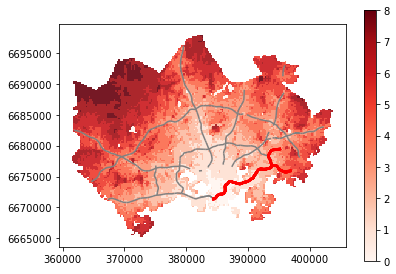

In [23]:
#都心までのくる今の所要時間をマッピング

mymap= grid.plot(column="car_r_t_class", linewidth=0.03,cmap="Reds",legend=True, alpha=0.9)

#Add road on the top of the grid
road.plot(ax=mymap, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=mymap, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

In [31]:
#外部マップとの組み合わせ ESPG 3857に変換

import contextily as ctx 

data= grid.to_crs(epsg=3857)

print(data.crs)

{'init': 'epsg:3857', 'no_defs': True}


In [30]:
def classfication(grid,n_classes, column,new_name):
    classifier= ps.Natural_Breaks.make(k=n_classes)

    classfications= grid[[column]].apply(classifier)
    
    classfications.columns= [new_name]

    grid= grid.join(classfications)
    return grid

    
data1=classfication(data,9,"pt_r_t", "pt_r_t_class")

KeyboardInterrupt: 

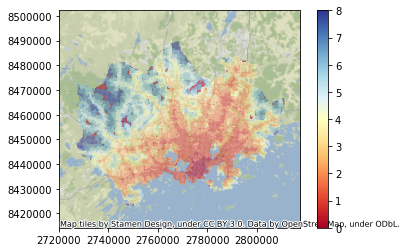

In [28]:
ax= data.plot(column="pt_r_t_class", linewidth=0.03,cmap="RdYlBu",legend=True, alpha=0.6)

ctx.add_basemap(ax)


In [29]:
#background mapを変更することができる　

print(dir(ctx.tile_providers))

['OSM_A', 'OSM_B', 'OSM_C', 'ST_TERRAIN', 'ST_TERRAIN_BACKGROUND', 'ST_TERRAIN_LABELS', 'ST_TERRAIN_LINES', 'ST_TONER', 'ST_TONER_BACKGROUND', 'ST_TONER_HYBRID', 'ST_TONER_LABELS', 'ST_TONER_LINES', 'ST_TONER_LITE', 'ST_WATERCOLOR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [33]:
subset=data.loc[(data["pt_r_t"]>=0)&(data["pt_r_t"]<=10)]

subset=classfication(subset, 9, "pt_r_t","pt_r_t_2")


In [34]:
subset.columns

Index(['car_m_d', 'car_m_t', 'car_r_d', 'car_r_t', 'from_id', 'pt_m_d',
       'pt_m_t', 'pt_m_tt', 'pt_r_d', 'pt_r_t', 'pt_r_tt', 'to_id', 'walk_d',
       'walk_t', 'geometry', 'car_r_t_class', 'pt_r_t_2'],
      dtype='object')

(8435000, 8442500)

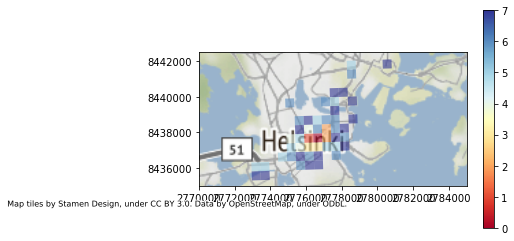

In [41]:
ax= subset.plot(column="pt_r_t_2", linewidth=0.03,cmap="RdYlBu",legend=True, alpha=0.6)

ctx.add_basemap(ax, zoom=11)


# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)